In [1]:
import pandas as pd
import numpy as np
import itertools 
from sklearn.model_selection import train_test_split
from sklearn import linear_model, svm
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix,accuracy_score, recall_score, roc_auc_score, auc, f1_score
import matplotlib.pyplot as plt
import datetime
from sklearn.kernel_approximation import RBFSampler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import plot_tree
from xgboost import plot_importance
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
file = 'C:\\Users\\RAUL\\Documents\\OrgDatos2\\Data\\events_TP2.csv'
testFile = 'C:\\Users\\RAUL\\Documents\\OrgDatos2\\Data\\events_TEST.csv'
trainingFile = 'C:\\Users\\RAUL\\Documents\\OrgDatos2\\Data\\events_TRAINING.csv'

In [3]:
df = pd.read_csv(file)

C:\Users\RAUL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [5]:
df.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-18 00:11:59,viewed product,4886f805,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-18 00:11:27,viewed product,ad93850f,NaN,304.0,iPhone 5s,Muito Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-05-18 00:11:16,viewed product,0297fc1e,NaN,6888.0,iPhone 6S,Muito Bom,64GB,Prateado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-18 00:11:14,viewed product,2d681dd8,NaN,11890.0,iPhone 7,Bom,128GB,Vermelho,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-18 00:11:09,viewed product,cccea85e,NaN,7517.0,LG G4 H818P,Excelente,32GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.sort_values(['person', 'timestamp'] , inplace = True)

In [7]:
df['timestamp'].max() - datetime.timedelta(days=15)

Timestamp('2018-05-16 23:59:59')

In [34]:
df['country'].value_counts(dropna = False)

NaN                      2137612
Brazil                    197699
Unknown                     5273
United States                634
Argentina                    123
Canada                        75
France                        34
Paraguay                      29
Netherlands                   23
Uruguay                       17
Italy                         15
United Kingdom                14
Israel                        10
Mexico                         9
Germany                        9
Mozambique                     8
Singapore                      8
Bolivia                        7
Guadeloupe                     7
Colombia                       6
Belgium                        6
Bulgaria                       5
Costa Rica                     5
Portugal                       5
Vietnam                        4
Morocco                        4
Bangladesh                     4
Spain                          3
Angola                         3
Slovak Republic                3
Sweden    

In [35]:
paises = df.groupby('person')['country'].first().reset_index()
regiones = df.groupby('person')['region'].first().reset_index()
ciudades = df.groupby('person')['city'].first().reset_index()

demografica = paises.merge(regiones, on = 'person')
demografica = demografica.merge(ciudades, on = 'person')

encoder = ce.BinaryEncoder(cols=['country', 'region', 'city'])
demografica_binary = encoder.fit_transform(demografica)

personas.merge(demografica_binary, on = 'person', how = 'left')

In [37]:
demografica['person'].nunique()

38829

In [39]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['country', 'region', 'city'])
df_binary = encoder.fit_transform(demografica)

In [40]:
df_binary

,country_0,country_1,country_2,country_3,country_4,country_5,country_6,region_0,region_1,region_2,...,city_3,city_4,city_5,city_6,city_7,city_8,city_9,city_10,city_11,person
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0008ed71
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,00091926
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,00091a7a
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,000ba417
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,000c79fe
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,000e4d9e
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,000e619d
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,1,001001be
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0010e89a
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0016c4b5


In [26]:
lb.fit_transform(paises['country'])

TypeError: '<' not supported between instances of 'float' and 'str'

In [25]:
ultima_fecha = df['timestamp'].max()

ult_check = df[df['event'] == 'checkout'].groupby('person')['timestamp'].max().reset_index().rename(columns = {'timestamp' : 'ult_checkout'}) 

ult_check['ult_checkout_dias']  = (ultima_fecha - ult_check['ult_checkout']).dt.days

ult_check['ult_checkout_segundos']  = (ultima_fecha - ult_check['ult_checkout']).dt.total_seconds()

del ult_check['ult_checkout']

In [13]:
act_30_dias = pd.DataFrame(df[df['timestamp'] >= (df['timestamp'].max() - datetime.timedelta(days=30))].groupby('person')['timestamp'].count()).reset_index().rename(columns = {'timestamp' : 'actividades_ult_30dias'})


In [37]:
modelos_mas_vistos = pd.DataFrame(df[df['event'] == 'viewed product'].groupby('person')['model'].agg(lambda x:x.value_counts()[0])).reset_index().rename(columns = {'model' : 'mas_visto'})

total_vistos = pd.DataFrame(df[df['event'] == 'viewed product'].groupby('person')['model'].count().reset_index().rename(columns = {'model' : 'total_vistos'}))

modelos_mas_vistos = modelos_mas_vistos.merge(total_vistos, on = 'person')

modelos_mas_vistos['%_mas_visto'] = modelos_mas_vistos['mas_visto']/modelos_mas_vistos['total_vistos']

In [36]:
modelos_mas_vistos = pd.DataFrame(df[df['event'] == 'viewed product'].groupby('person')['model'].agg(lambda x:x.value_counts()[0])).reset_index().rename(columns = {'model' : 'mas_visto'})
total_vistos = pd.DataFrame(df[df['event'] == 'viewed product'].groupby('person')['model'].count().reset_index().rename(columns = {'model' : 'total_vistos'})
#modelos_mas_vistos = modelos_mas_vistos.merge(total_vistos, on = 'person')

SyntaxError: unexpected EOF while parsing (<ipython-input-36-21da71dc25a2>, line 3)

In [32]:
df['person'].value_counts()[1]

3458

In [27]:
df[df['event'] == 'viewed product'].groupby('person')['model'].count().reset_index()

,person,model
0,00091926,372
1,00091a7a,3
2,000ba417,153
3,000c79fe,3
4,000e4d9e,339
5,000e619d,28
6,001001be,41
7,0010e89a,1
8,0016c4b5,1
9,001802e4,4


In [18]:
check_dias = pd.DataFrame(df[(df['timestamp'] >= (df['timestamp'].max() - datetime.timedelta(days=30))) & (df['event'] == 'checkout')].groupby('person')['timestamp'].count()).reset_index().rename(columns = {'timestamp' : 'check'})


In [19]:
check_dias

,person,check
0,0008ed71,3
1,00091926,2
2,000ba417,6
3,000c79fe,1
4,000e4d9e,1
5,000e619d,1
6,001001be,3
7,0010e89a,1
8,0016c4b5,1
9,001802e4,1


In [14]:
act_30_dias

,person,actividades_ult_30dias
0,0008ed71,6
1,00091926,448
2,000ba417,206
3,000c79fe,17
4,000e4d9e,411
5,000e619d,68
6,001001be,68
7,0010e89a,4
8,0016c4b5,4
9,001802e4,19


In [8]:
inicio = df['timestamp'].max() - datetime.timedelta(days=15)
fin = df['timestamp'].max() - datetime.timedelta(days=60)

In [9]:
df_antes = df[(df['timestamp'] <= inicio) & (df['timestamp'] >= fin)].copy()

df_despues = df[df['timestamp'] > df['timestamp'].max() - datetime.timedelta(days=15)].copy()

#df_antes = df_antes[df_antes['person'].isin(df_despues['person'].unique().tolist())]

personas = pd.DataFrame(df_antes['person'].drop_duplicates()).reset_index(drop = True)

compraron = pd.DataFrame(df_despues[df_despues['event'] == 'conversion']['person'].drop_duplicates()).reset_index(drop = True)

labels = personas.merge(compraron, on = 'person', how = 'left', indicator = True)

labels['label'] =  labels['_merge'].apply(lambda x : 1 if x == 'both' else 0)

del labels['_merge']

In [98]:
personas = df[['person']].drop_duplicates()

In [10]:
def sesiones_feature(df, personas, tiempo_inactividad):
    gt_30min = df.timestamp.diff() > datetime.timedelta(minutes=tiempo_inactividad)
    diff_user = df.person != df.person.shift()
    df['# Visita'] = (diff_user | gt_30min).cumsum()
    duracion_sesiones = pd.DataFrame(df.groupby(['person', '# Visita'])['timestamp'].agg(lambda x : x.max() - x.min())).reset_index()
    sumas_sesiones = pd.DataFrame(duracion_sesiones.groupby('person')['timestamp'].sum()).reset_index().rename(columns = {'timestamp' : 'sum'})
    cantidad_sesiones =  pd.DataFrame(duracion_sesiones.groupby('person')['timestamp'].count()).reset_index().rename(columns = {'timestamp' : 'cantidad_sesiones'})
    sesiones = sumas_sesiones.merge(cantidad_sesiones, on = 'person')
    sesiones['promedio_sesiones'] = pd.to_timedelta(pd.to_timedelta(sesiones['sum'])/sesiones['cantidad_sesiones'], unit = 'ns').dt.round('1s')
    sesiones['promedio_sesiones_sec'] = sesiones['promedio_sesiones'].dt.total_seconds()
    sesiones['tiempo_total_sesiones_sec'] = sesiones['sum'].dt.total_seconds()
    del sesiones['promedio_sesiones']
    del sesiones['sum']
    return personas.merge(sesiones, on = 'person', how = 'left').fillna(0)

In [11]:
#act30 = df[df['timestamp'] >= pd.to_datetime('2018-04-30')].groupby('person')['timestamp'].count().reset_index().rename(columns = {'timestamp' : '#act_ult30dias'})

In [12]:
def marcas_vistas_feature(df, personas):
    samsung_vistos = df[(df['event'] == 'viewed product') & (df['model'].str.lower().str.contains('samsung') == True)].groupby('person')['timestamp'].count().reset_index().rename(columns = {'timestamp' : 'samsung_vistos'})
    iphone_vistos  = df[(df['event'] == 'viewed product') & (df['model'].str.lower().str.contains('iphone') == True)].groupby('person')['timestamp'].count().reset_index().rename(columns = {'timestamp' : 'iphone_vistos'})
    motorola_vistos = df[(df['event'] == 'viewed product') & (df['model'].str.lower().str.contains('motorola') == True)].groupby('person')['timestamp'].count().reset_index().rename(columns = {'timestamp' : 'motorola_vistos'})
    marcas_vistas = samsung_vistos.merge(iphone_vistos, on = 'person', how = 'left').fillna(0)
    marcas_vistas = marcas_vistas.merge(motorola_vistos, on = 'person', how = 'left').fillna(0)
    marcas_vistas['total_marcas_vistas'] = marcas_vistas['samsung_vistos'] + marcas_vistas['iphone_vistos'] + marcas_vistas['motorola_vistos']
    marcas_vistas['%_vistos_samsung'] = marcas_vistas['samsung_vistos'] / marcas_vistas['total_marcas_vistas']
    marcas_vistas['%_vistos_motorola'] = marcas_vistas['motorola_vistos'] / marcas_vistas['total_marcas_vistas']
    marcas_vistas['%_vistos_iphone'] = marcas_vistas['iphone_vistos'] / marcas_vistas['total_marcas_vistas']
    personas = personas.merge(marcas_vistas, on = 'person', how = 'left')
    personas['total_marcas_vistas'] = personas['total_marcas_vistas'].fillna(0)
    personas['%_vistos_samsung'] = personas['%_vistos_samsung'].fillna(0)
    personas['%_vistos_iphone'] = personas['%_vistos_iphone'].fillna(0)
    personas['%_vistos_motorola'] = personas['%_vistos_motorola'].fillna(0)
    personas['samsung_vistos'] = personas['samsung_vistos'].fillna(0)
    personas['iphone_vistos'] = personas['iphone_vistos'].fillna(0)
    personas['motorola_vistos'] = personas['motorola_vistos'].fillna(0)
    return personas

In [13]:
def modelos_vistos_feature(df, personas):
    modelos_vistos = df[df['event'] == 'viewed product'].groupby('person')['model'].agg({'modelos_vistos': 'count','modelos_distintos': 'nunique'})
    sku_vistos = df[df['event'] == 'viewed product'].groupby('person')['sku'].agg({'sku_distintos': 'nunique'})
    vistos = modelos_vistos.merge(sku_vistos, on  = 'person')
    personas = personas.merge(vistos, on = 'person', how = 'left')
    personas['modelos_vistos'] = personas['modelos_vistos'].fillna(0)
    personas['modelos_distintos'] = personas['modelos_distintos'].fillna(0)
    personas['sku_distintos'] = personas['sku_distintos'].fillna(0)
    return personas

Analizaremos los caminos que realizan las personas antes de comprar

In [14]:
def compro(x):
    if('conversion' in x):
        return True
    else:
        return False
    
def borrarRepe(lista):
    return [x[0] for x in itertools.groupby(lista)]

def eliminarConv(x):
    if('conversion' in x):
        return x.remove('conversion')
    else:
        return x

In [15]:
maxdate = max(df['timestamp'])

In [16]:
maxdate.date()

datetime.date(2018, 5, 31)

In [17]:
def caminos_feature(df, personas):
    ultima_fecha = pd.to_datetime(max(df['timestamp']))
    paths = df.sort_values(by = 'timestamp').copy()
    paths['#Camino'] = paths.groupby('person')['event'].apply(lambda x : x.eq('conversion').shift().fillna(0).cumsum())
    #Veremos la cantidad de modelos y Sku vistos en cada camino
    paths2 = paths.groupby(['person','#Camino'])['event'].apply(list).reset_index().rename(columns = {'event' : 'camino'})
    camino = paths.groupby(['person','#Camino'])['event'].apply(list).reset_index().rename(columns = {'event' : 'camino'})['camino']
    paths2['compro'] = paths2['camino'].apply(lambda x : compro(x))
    paths2.rename(columns = {'camino' : 'camino_sin_compra'}, inplace = True)
    paths2['camino_con_compra'] = camino.copy()
    paths2['#pasos_antes_comprar'] = paths2['camino_sin_compra'].apply(lambda x : len(x))
    camino2 = paths2['camino_sin_compra'].copy()
    paths2['camino_sin_compra_sin_rep'] = camino2.apply(lambda x : borrarRepe(x))
    paths2 = paths2.merge(paths.groupby(['person', '#Camino'])['timestamp'].agg({'primer_paso_time' : 'min', 'ultimo_paso_time' : 'max'}), on = ['person','#Camino'])
    paths2['primer_paso_date'] = pd.to_datetime(paths2['primer_paso_time'].dt.date)
    paths2['ultimo_paso_date'] = pd.to_datetime(paths2['ultimo_paso_time'].dt.date)
    paths2['primera_actividad_ultimo_paso'] = (ultima_fecha - paths2['primer_paso_date']).dt.days
    paths2['ultima_actividad'] = (ultima_fecha - paths2['ultimo_paso_date']).dt.days
    del paths2['primer_paso_time']
    del paths2['ultimo_paso_time']
    del paths2['camino_sin_compra']
    del paths2['camino_con_compra']
    del paths2['camino_sin_compra_sin_rep']
    del paths2['primer_paso_date']
    del paths2['ultimo_paso_date']
    return personas.merge(paths2, on = 'person', how = 'left')

In [18]:
def primera_actividad_feature(df, personas):
    ultima_fecha = pd.to_datetime(max(df['timestamp']))
    primera_actividad = df.groupby('person')['timestamp'].min().reset_index().rename(columns = {'timestamp' : 'fecha_primera_actividad'})
    primera_actividad['fecha_primera_actividad'] = pd.to_datetime(primera_actividad['fecha_primera_actividad'].dt.date)
    primera_actividad['primera_actividad'] = (ultima_fecha - primera_actividad['fecha_primera_actividad']).dt.days
    del primera_actividad['fecha_primera_actividad']
    return personas.merge(primera_actividad, on = 'person', how ='left')

In [19]:
def cantidad_de_actividades_feature(df, personas):
    actividades = df.groupby('person')['timestamp'].count().reset_index().rename(columns = {'timestamp' : '# Actividades'})
    return personas.merge(actividades, on = 'person', how ='left')

In [99]:
personas = sesiones_feature(df, personas, 45)

In [100]:
personas.head()

,person,cantidad_sesiones,promedio_sesiones_sec,tiempo_total_sesiones_sec
0,0008ed71,3,135.0,404.0
1,00091926,31,708.0,21934.0
2,00091a7a,1,347.0,347.0
3,000ba417,5,2541.0,12703.0
4,000c79fe,1,620.0,620.0


In [101]:
personas = marcas_vistas_feature(df, personas)

In [102]:
personas.head()

,person,cantidad_sesiones,promedio_sesiones_sec,tiempo_total_sesiones_sec,samsung_vistos,iphone_vistos,motorola_vistos,total_marcas_vistas,%_vistos_samsung,%_vistos_motorola,%_vistos_iphone
0,0008ed71,3,135.0,404.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,00091926,31,708.0,21934.0,61.0,251.0,55.0,367.0,0.166213,0.149864,0.683924
2,00091a7a,1,347.0,347.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,000ba417,5,2541.0,12703.0,105.0,8.0,35.0,148.0,0.709459,0.236486,0.054054
4,000c79fe,1,620.0,620.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [103]:
personas = modelos_vistos_feature(df, personas)

C:\Users\RAUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\Users\RAUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
personas.head()

,person,cantidad_sesiones,promedio_sesiones_sec,tiempo_total_sesiones_sec,samsung_vistos,iphone_vistos,motorola_vistos,total_marcas_vistas,%_vistos_samsung,%_vistos_motorola,%_vistos_iphone,modelos_vistos,modelos_distintos,sku_distintos
0,0008ed71,3,135.0,404.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,00091926,31,708.0,21934.0,61.0,251.0,55.0,367.0,0.166213,0.149864,0.683924,372.0,36.0,164.0
2,00091a7a,1,347.0,347.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.0,3.0,3.0
3,000ba417,5,2541.0,12703.0,105.0,8.0,35.0,148.0,0.709459,0.236486,0.054054,153.0,26.0,81.0
4,000c79fe,1,620.0,620.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.0,1.0,1.0


In [105]:
personas = caminos_feature(df, personas)

C:\Users\RAUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [106]:
personas.head()

,person,cantidad_sesiones,promedio_sesiones_sec,tiempo_total_sesiones_sec,samsung_vistos,iphone_vistos,motorola_vistos,total_marcas_vistas,%_vistos_samsung,%_vistos_motorola,%_vistos_iphone,modelos_vistos,modelos_distintos,sku_distintos,#Camino,compro,#pasos_antes_comprar,primera_actividad_ultimo_paso,ultima_actividad
0,0008ed71,3,135.0,404.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,False,6,14,14
1,00091926,31,708.0,21934.0,61.0,251.0,55.0,367.0,0.166213,0.149864,0.683924,372.0,36.0,164.0,0,False,448,28,0
2,00091a7a,1,347.0,347.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.0,3.0,3.0,0,False,10,66,66
3,000ba417,5,2541.0,12703.0,105.0,8.0,35.0,148.0,0.709459,0.236486,0.054054,153.0,26.0,81.0,0,True,206,14,5
4,000c79fe,1,620.0,620.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.0,1.0,1.0,0,False,17,2,2


In [107]:
personas = primera_actividad_feature(df, personas)

In [108]:
personas.head()

,person,cantidad_sesiones,promedio_sesiones_sec,tiempo_total_sesiones_sec,samsung_vistos,iphone_vistos,motorola_vistos,total_marcas_vistas,%_vistos_samsung,%_vistos_motorola,%_vistos_iphone,modelos_vistos,modelos_distintos,sku_distintos,#Camino,compro,#pasos_antes_comprar,primera_actividad_ultimo_paso,ultima_actividad,primera_actividad
0,0008ed71,3,135.0,404.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,False,6,14,14,14
1,00091926,31,708.0,21934.0,61.0,251.0,55.0,367.0,0.166213,0.149864,0.683924,372.0,36.0,164.0,0,False,448,28,0,28
2,00091a7a,1,347.0,347.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.0,3.0,3.0,0,False,10,66,66,66
3,000ba417,5,2541.0,12703.0,105.0,8.0,35.0,148.0,0.709459,0.236486,0.054054,153.0,26.0,81.0,0,True,206,14,5,14
4,000c79fe,1,620.0,620.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.0,1.0,1.0,0,False,17,2,2,2


In [109]:
personas = cantidad_de_actividades_feature(df, personas)

In [110]:
personas.head()

,person,cantidad_sesiones,promedio_sesiones_sec,tiempo_total_sesiones_sec,samsung_vistos,iphone_vistos,motorola_vistos,total_marcas_vistas,%_vistos_samsung,%_vistos_motorola,...,modelos_vistos,modelos_distintos,sku_distintos,#Camino,compro,#pasos_antes_comprar,primera_actividad_ultimo_paso,ultima_actividad,primera_actividad,# Actividades
0,0008ed71,3,135.0,404.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,False,6,14,14,14,6
1,00091926,31,708.0,21934.0,61.0,251.0,55.0,367.0,0.166213,0.149864,...,372.0,36.0,164.0,0,False,448,28,0,28,448
2,00091a7a,1,347.0,347.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,3.0,3.0,3.0,0,False,10,66,66,66,10
3,000ba417,5,2541.0,12703.0,105.0,8.0,35.0,148.0,0.709459,0.236486,...,153.0,26.0,81.0,0,True,206,14,5,14,206
4,000c79fe,1,620.0,620.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,3.0,1.0,1.0,0,False,17,2,2,2,17


In [111]:
personas['compro'] = personas['compro'].apply(lambda x : 1 if (x == True) else 0)

In [112]:
trainingData = pd.read_csv(trainingFile)
training = personas.merge(trainingData, on = 'person', how = 'left', indicator = True)


In [126]:
#training = personas.merge(labels, on = 'person').drop_duplicates(subset = 'person', keep = 'last')
training = training[training['_merge'] == 'both']
del training['_merge']

In [130]:
training['label'].value_counts()

0.0    21263
1.0     1388
Name: label, dtype: int64

In [97]:
#training = personas.merge(labels, on = 'person').drop_duplicates(subset = 'person', keep = 'last')

In [131]:
training.head()

,person,cantidad_sesiones,promedio_sesiones_sec,tiempo_total_sesiones_sec,samsung_vistos,iphone_vistos,motorola_vistos,total_marcas_vistas,%_vistos_samsung,%_vistos_motorola,...,modelos_distintos,sku_distintos,#Camino,compro,#pasos_antes_comprar,primera_actividad_ultimo_paso,ultima_actividad,primera_actividad,# Actividades,label
0,0008ed71,3,135.0,404.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0,0,6,14,14,14,6,0.0
4,000c79fe,1,620.0,620.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,1.0,1.0,0,0,17,2,2,2,17,0.0
11,001802e4,1,646.0,646.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,2.0,2.0,0,0,19,0,0,0,19,0.0
14,0019e639,19,576.0,10938.0,55.0,2.0,131.0,188.0,0.292553,0.696809,...,26.0,67.0,0,1,60,123,111,123,471,0.0
15,0019e639,19,576.0,10938.0,55.0,2.0,131.0,188.0,0.292553,0.696809,...,26.0,67.0,1,1,404,111,9,123,471,0.0


In [132]:
training_aux = training.copy()

In [133]:
training_true = training_aux[training_aux['label'] == 1]

In [134]:
training_false = training_aux[training_aux['label'] == 0].sample(int(len(training_aux[training_aux['label'] == 1]) * 1.2), random_state = 10)

In [135]:
training = training_true.append(training_false).sort_index()

In [136]:
training['label'].value_counts()

0.0    1665
1.0    1388
Name: label, dtype: int64

In [137]:
training['label'].value_counts().values[0]

1665

In [138]:
porcentaje_neg = training['label'].value_counts().values[0] / training['label'].value_counts().values[1]

In [139]:
correlations_data = training.corr()['label'].sort_values()

In [140]:
correlations_data

promedio_sesiones_sec            0.044269
%_vistos_iphone                  0.051712
%_vistos_samsung                 0.062155
iphone_vistos                    0.064091
#pasos_antes_comprar             0.088886
%_vistos_motorola                0.096521
motorola_vistos                  0.107210
total_marcas_vistas              0.156412
modelos_vistos                   0.163534
#Camino                          0.176981
samsung_vistos                   0.182233
sku_distintos                    0.196137
compro                           0.199719
tiempo_total_sesiones_sec        0.200653
# Actividades                    0.208472
cantidad_sesiones                0.209484
ultima_actividad                 0.227534
modelos_distintos                0.227556
primera_actividad_ultimo_paso    0.250628
primera_actividad                0.299314
label                            1.000000
Name: label, dtype: float64

In [141]:
features = training.drop(columns='label')
targets = pd.DataFrame(training['label'])

In [142]:
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 5)

In [143]:
print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(2137, 21)
(916, 21)
(2137, 1)
(916, 1)


In [144]:
com = X.copy()

In [145]:
del X['person']
del X_test['person']

In [213]:
## Import the random forest model.
from sklearn.ensemble import RandomForestClassifier 
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X, y) 
## And score it on your testing data.
#rf.score(X_test, y_test)

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

C:\Users\RAUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [214]:
feature_importances

,importance
primera_actividad,0.103477
primera_actividad_ultimo_paso,0.088223
tiempo_total_sesiones_sec,0.087982
promedio_sesiones_sec,0.078140
# Actividades,0.076504
sku_distintos,0.060257
#pasos_antes_comprar,0.059977
ultima_actividad,0.058281
cantidad_sesiones,0.057850
modelos_vistos,0.055866


In [215]:
data_dmatrix = xgb.DMatrix(data=X,label=y.values.ravel())
#clf = xgb.XGBClassifier(eval_metric = 'auc', scale_pos_weight = porcentaje_neg, max_depth=5)
clf = xgb.XGBClassifier(scale_pos_weight = porcentaje_neg, eval_metric='auc')
clf.fit(X, y.values.ravel(), eval_metric='auc')
y_pred = clf.predict(X_test)

C:\Users\RAUL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


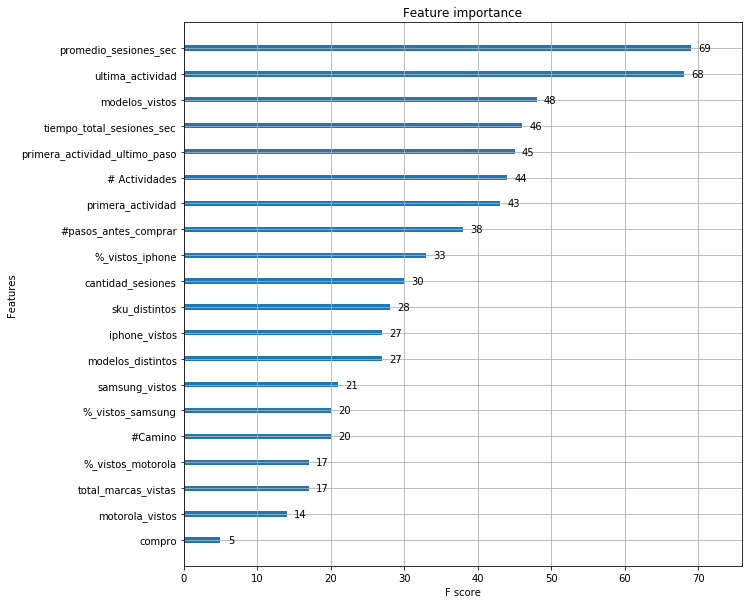

In [216]:
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(clf, ax=ax)
plt.show()

In [150]:
y_test

,label
43223,0.0
26580,0.0
12832,1.0
14034,0.0
31914,1.0
27761,0.0
2107,0.0
7949,0.0
30400,0.0
3452,0.0


In [151]:
y_pred

array([0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0.

In [152]:
y_test['pred'] = pd.Series(y_pred).values

C:\Users\RAUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [153]:
y_test

,label,pred
43223,0.0,0.0
26580,0.0,0.0
12832,1.0,1.0
14034,0.0,0.0
31914,1.0,1.0
27761,0.0,0.0
2107,0.0,0.0
7949,0.0,1.0
30400,0.0,0.0
3452,0.0,0.0


In [154]:
confusion_matrix(y_test['label'], y_test['pred'])

array([[357, 143],
       [147, 269]], dtype=int64)

In [155]:
print (f1_score(y_test['label'], y_test['pred']))

0.6497584541062802


In [156]:
print (recall_score(y_test['label'], y_test['pred']))

0.6466346153846154


In [157]:
print (roc_auc_score(y_test['label'], y_test['pred']))


0.6803173076923077


In [158]:
X_test

,cantidad_sesiones,promedio_sesiones_sec,tiempo_total_sesiones_sec,samsung_vistos,iphone_vistos,motorola_vistos,total_marcas_vistas,%_vistos_samsung,%_vistos_motorola,%_vistos_iphone,modelos_vistos,modelos_distintos,sku_distintos,#Camino,compro,#pasos_antes_comprar,primera_actividad_ultimo_paso,ultima_actividad,primera_actividad,# Actividades
43223,2,127.0,254.0,14.0,0.0,0.0,14.0,1.000000,0.000000,0.000000,14.0,2.0,8.0,0,0,26,2,1,2,26
26580,1,3.0,3.0,1.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,1.0,1.0,1.0,0,0,4,3,3,3,4
12832,17,664.0,11285.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,103.0,7.0,50.0,1,1,1,14,14,15,184
14034,4,1044.0,4175.0,7.0,0.0,0.0,7.0,1.000000,0.000000,0.000000,7.0,3.0,3.0,0,0,54,2,1,2,54
31914,41,627.0,25692.0,213.0,0.0,0.0,213.0,1.000000,0.000000,0.000000,215.0,22.0,78.0,23,1,2,1,1,59,425
27761,1,4222.0,4222.0,5.0,13.0,25.0,43.0,0.116279,0.581395,0.302326,50.0,21.0,32.0,0,0,63,16,16,16,63
2107,1,261.0,261.0,2.0,0.0,0.0,2.0,1.000000,0.000000,0.000000,2.0,1.0,1.0,0,0,6,8,8,8,6
7949,24,544.0,13059.0,127.0,50.0,12.0,189.0,0.671958,0.063492,0.264550,197.0,46.0,103.0,0,0,410,119,2,119,410
30400,4,133.0,532.0,3.0,13.0,0.0,16.0,0.187500,0.000000,0.812500,16.0,4.0,14.0,2,1,1,2,2,8,31
3452,33,557.0,18379.0,144.0,11.0,21.0,176.0,0.818182,0.119318,0.062500,190.0,26.0,72.0,0,0,293,32,2,32,293


In [349]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn import cross_validation
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 500),
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.45),
              'min_child_weight': [1, 2, 3]
             }
clf = RandomizedSearchCV(clf_xgb, param_distributions = param_dist, n_iter = 25, scoring = 'roc_auc', error_score = 0, verbose = 3, n_jobs = -1)

numFolds = 10
folds = cross_validation.KFold(n = len(X), shuffle = True, n_folds = numFolds)

estimators = []
results = np.zeros(len(X))
score = 0.0
for train_index, test_index in folds:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
    clf.fit(X_train, y_train)

    estimators.append(clf.best_estimator_)
    results[test_index] = clf.predict(X_test)
    score += roc_auc_score(y_test, results[test_index])
score /= numFolds

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   12.0s finished
C:\Users\RAUL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   14.8s finished
C:\Users\RAUL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   14.8s finished
C:\Users\RAUL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   15.2s finished
C:\Users\RAUL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   14.8s finished
C:\Users\RAUL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   14.4s finished
C:\Users\RAUL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   18.9s finished
C:\Users\RAUL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   13.4s finished
C:\Users\RAUL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   13.1s finished
C:\Users\RAUL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   12.4s finished
C:\Users\RAUL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [159]:
estimators

NameError: name 'estimators' is not defined

In [160]:
score

NameError: name 'score' is not defined

In [352]:
results

array([1., 0., 1., ..., 1., 0., 1.])

In [161]:
X.reset_index(drop=True)

,cantidad_sesiones,promedio_sesiones_sec,tiempo_total_sesiones_sec,samsung_vistos,iphone_vistos,motorola_vistos,total_marcas_vistas,%_vistos_samsung,%_vistos_motorola,%_vistos_iphone,modelos_vistos,modelos_distintos,sku_distintos,#Camino,compro,#pasos_antes_comprar,primera_actividad_ultimo_paso,ultima_actividad,primera_actividad,# Actividades
0,1,22.0,22.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,1.0,1.0,0,0,4,6,6,6,4
1,41,627.0,25692.0,213.0,0.0,0.0,213.0,1.000000,0.000000,0.000000,215.0,22.0,78.0,13,1,5,2,2,59,425
2,43,542.0,23327.0,233.0,10.0,21.0,264.0,0.882576,0.079545,0.037879,270.0,34.0,103.0,4,1,1,16,16,64,449
3,3,1382.0,4147.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,24.0,4.0,10.0,3,0,17,5,2,5,48
4,1,520.0,520.0,2.0,0.0,5.0,7.0,0.285714,0.714286,0.000000,9.0,7.0,7.0,0,0,13,7,7,7,13
5,3,1022.0,3067.0,1.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,1.0,1.0,1.0,2,0,5,68,67,68,18
6,2,68.0,136.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,1.0,1.0,0,0,11,7,2,7,11
7,2,34.0,67.0,4.0,0.0,0.0,4.0,1.000000,0.000000,0.000000,4.0,1.0,2.0,0,0,10,6,5,6,10
8,1,58.0,58.0,1.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,1.0,1.0,1.0,0,0,5,1,1,1,5
9,23,175.0,4029.0,85.0,1.0,3.0,89.0,0.955056,0.033708,0.011236,92.0,17.0,37.0,0,0,145,12,1,12,145


In [163]:
personas.head()

,person,cantidad_sesiones,promedio_sesiones_sec,tiempo_total_sesiones_sec,samsung_vistos,iphone_vistos,motorola_vistos,total_marcas_vistas,%_vistos_samsung,%_vistos_motorola,...,sku_distintos,#Camino,compro,#pasos_antes_comprar,primera_actividad_ultimo_paso,ultima_actividad,primera_actividad,# Actividades,label,_merge
0,0008ed71,3,135.0,404.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0,0,6,14,14,14,6,0.0,both
1,00091926,31,708.0,21934.0,61.0,251.0,55.0,367.0,0.166213,0.149864,...,164.0,0,0,448,28,0,28,448,NaN,left_only
2,00091a7a,1,347.0,347.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,3.0,0,0,10,66,66,66,10,NaN,left_only
3,000ba417,5,2541.0,12703.0,105.0,8.0,35.0,148.0,0.709459,0.236486,...,81.0,0,1,206,14,5,14,206,NaN,left_only
4,000c79fe,1,620.0,620.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,1.0,0,0,17,2,2,2,17,0.0,both


In [195]:
test = personas.drop_duplicates(subset = 'person', keep = 'last').copy()

In [196]:
test.head()

,person,cantidad_sesiones,promedio_sesiones_sec,tiempo_total_sesiones_sec,samsung_vistos,iphone_vistos,motorola_vistos,total_marcas_vistas,%_vistos_samsung,%_vistos_motorola,...,sku_distintos,#Camino,compro,#pasos_antes_comprar,primera_actividad_ultimo_paso,ultima_actividad,primera_actividad,# Actividades,label,_merge
0,0008ed71,3,135.0,404.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0,0,6,14,14,14,6,0.0,both
1,00091926,31,708.0,21934.0,61.0,251.0,55.0,367.0,0.166213,0.149864,...,164.0,0,0,448,28,0,28,448,NaN,left_only
2,00091a7a,1,347.0,347.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,3.0,0,0,10,66,66,66,10,NaN,left_only
3,000ba417,5,2541.0,12703.0,105.0,8.0,35.0,148.0,0.709459,0.236486,...,81.0,0,1,206,14,5,14,206,NaN,left_only
4,000c79fe,1,620.0,620.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,1.0,0,0,17,2,2,2,17,0.0,both


In [197]:
test.shape

(38829, 23)

In [198]:
test = test[test['_merge'] == 'left_only']

In [199]:
del test['label']
del test['_merge']


In [200]:
test.shape

(19415, 21)

In [201]:
test_X = test[list(X.columns.values)]

In [202]:
test_X

,cantidad_sesiones,promedio_sesiones_sec,tiempo_total_sesiones_sec,samsung_vistos,iphone_vistos,motorola_vistos,total_marcas_vistas,%_vistos_samsung,%_vistos_motorola,%_vistos_iphone,modelos_vistos,modelos_distintos,sku_distintos,#Camino,compro,#pasos_antes_comprar,primera_actividad_ultimo_paso,ultima_actividad,primera_actividad,# Actividades
1,31,708.0,21934.0,61.0,251.0,55.0,367.0,0.166213,0.149864,0.683924,372.0,36.0,164.0,0,0,448,28,0,28,448
2,1,347.0,347.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.0,3.0,3.0,0,0,10,66,66,66,10
3,5,2541.0,12703.0,105.0,8.0,35.0,148.0,0.709459,0.236486,0.054054,153.0,26.0,81.0,0,1,206,14,5,14,206
5,12,1267.0,15203.0,300.0,21.0,2.0,323.0,0.928793,0.006192,0.065015,339.0,37.0,105.0,0,0,411,15,1,15,411
6,5,246.0,1230.0,11.0,7.0,7.0,25.0,0.440000,0.280000,0.280000,28.0,23.0,25.0,0,0,68,16,13,16,68
8,3,1122.0,3367.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,41.0,3.0,19.0,1,0,3,15,9,15,68
9,1,43.0,43.0,1.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,1.0,1.0,1.0,0,0,4,1,1,1,4
10,1,2.0,2.0,1.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,1.0,1.0,1.0,0,0,4,2,2,2,4
13,2,404.0,808.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0,3,6,3,6,4
17,1,875.0,875.0,4.0,2.0,0.0,6.0,0.666667,0.000000,0.333333,6.0,2.0,2.0,0,0,16,11,11,11,16


In [203]:
test_X

,cantidad_sesiones,promedio_sesiones_sec,tiempo_total_sesiones_sec,samsung_vistos,iphone_vistos,motorola_vistos,total_marcas_vistas,%_vistos_samsung,%_vistos_motorola,%_vistos_iphone,modelos_vistos,modelos_distintos,sku_distintos,#Camino,compro,#pasos_antes_comprar,primera_actividad_ultimo_paso,ultima_actividad,primera_actividad,# Actividades
1,31,708.0,21934.0,61.0,251.0,55.0,367.0,0.166213,0.149864,0.683924,372.0,36.0,164.0,0,0,448,28,0,28,448
2,1,347.0,347.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.0,3.0,3.0,0,0,10,66,66,66,10
3,5,2541.0,12703.0,105.0,8.0,35.0,148.0,0.709459,0.236486,0.054054,153.0,26.0,81.0,0,1,206,14,5,14,206
5,12,1267.0,15203.0,300.0,21.0,2.0,323.0,0.928793,0.006192,0.065015,339.0,37.0,105.0,0,0,411,15,1,15,411
6,5,246.0,1230.0,11.0,7.0,7.0,25.0,0.440000,0.280000,0.280000,28.0,23.0,25.0,0,0,68,16,13,16,68
8,3,1122.0,3367.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,41.0,3.0,19.0,1,0,3,15,9,15,68
9,1,43.0,43.0,1.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,1.0,1.0,1.0,0,0,4,1,1,1,4
10,1,2.0,2.0,1.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,1.0,1.0,1.0,0,0,4,2,2,2,4
13,2,404.0,808.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0,3,6,3,6,4
17,1,875.0,875.0,4.0,2.0,0.0,6.0,0.666667,0.000000,0.333333,6.0,2.0,2.0,0,0,16,11,11,11,16


In [204]:
test_Y = clf.predict(test_X)

C:\Users\RAUL\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [205]:
test_Y

array([1., 1., 1., ..., 0., 1., 0.])

In [206]:
test['label'] = pd.Series(test_Y).values

In [207]:
test

,person,cantidad_sesiones,promedio_sesiones_sec,tiempo_total_sesiones_sec,samsung_vistos,iphone_vistos,motorola_vistos,total_marcas_vistas,%_vistos_samsung,%_vistos_motorola,...,modelos_distintos,sku_distintos,#Camino,compro,#pasos_antes_comprar,primera_actividad_ultimo_paso,ultima_actividad,primera_actividad,# Actividades,label
1,00091926,31,708.0,21934.0,61.0,251.0,55.0,367.0,0.166213,0.149864,...,36.0,164.0,0,0,448,28,0,28,448,1.0
2,00091a7a,1,347.0,347.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,3.0,3.0,0,0,10,66,66,66,10,1.0
3,000ba417,5,2541.0,12703.0,105.0,8.0,35.0,148.0,0.709459,0.236486,...,26.0,81.0,0,1,206,14,5,14,206,1.0
5,000e4d9e,12,1267.0,15203.0,300.0,21.0,2.0,323.0,0.928793,0.006192,...,37.0,105.0,0,0,411,15,1,15,411,1.0
6,000e619d,5,246.0,1230.0,11.0,7.0,7.0,25.0,0.440000,0.280000,...,23.0,25.0,0,0,68,16,13,16,68,0.0
8,001001be,3,1122.0,3367.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,3.0,19.0,1,0,3,15,9,15,68,0.0
9,0010e89a,1,43.0,43.0,1.0,0.0,0.0,1.0,1.000000,0.000000,...,1.0,1.0,0,0,4,1,1,1,4,0.0
10,0016c4b5,1,2.0,2.0,1.0,0.0,0.0,1.0,1.000000,0.000000,...,1.0,1.0,0,0,4,2,2,2,4,0.0
13,001804a2,2,404.0,808.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,1,0,3,6,3,6,4,0.0
17,001a2273,1,875.0,875.0,4.0,2.0,0.0,6.0,0.666667,0.000000,...,2.0,2.0,0,0,16,11,11,11,16,0.0


In [208]:
date = str(datetime.datetime.now().strftime('%d_%m_%Y_%H_%M_%S'))
training_file_name = 'C:\\Users\\RAUL\\Documents\\OrgDatos2\\TP2\\Training Sets\\training_' + date + '.csv'
file_name = 'C:\\Users\\RAUL\\Documents\\OrgDatos2\\TP2\\Submits\\' + date + '.csv'

In [209]:
training.to_csv(training_file_name)
test[['person','label']].to_csv(file_name, index = False)

In [210]:
X.shape

(2137, 20)